In [ ]:
# Imports (add)
import pandas as pd

In [ ]:
# Import data into Pandas DataFrame

import pandas as pd
df = pd.read_excel(r'/content/Tesla Battery Survey.xlsx', sheet_name='All entries')



In [ ]:
#calulating Cumulated energy use and Equivalent full cycles

df['Cumulated energy use'] = df['Lifetime average [Wh/mi or Wh/km]?']*df['Your range at 100%']
df['EFC'] = df['Mileage [km]']*df['Your range at 100%']

In [ ]:
# convert date columns to pd.to_daterime for calculating the difference in days for vehicle age
#What do you observe in this data? Any problems to address? (There were few negative numbers in years which is a data error, the data is in not right format for calculating the days)
df[['Date you charged to 100%','Manufacture date']] = df[['Date you charged to 100%','Manufacture date']].apply(pd.to_datetime) #if conversion required
df["Vehicle age"] = abs(df['Date you charged to 100%'] - df['Manufacture date']).dt.days

In [ ]:
#vehicle age in years
df["Vehicle age"]=df["Vehicle age"]/356

In [ ]:
#print df

df.head(10)

,Timestamp,Username,Region,Range unit,Manufacture date,Vehicle model,Supercharge frequency,100% charge frequency,Frequency of 5% or less range,Daily charge level ?,Range at 100% when car was new? [mi or km],Rated range [Wh/mi or Wh/km],Lifetime average [Wh/mi or Wh/km]?,"If battery was replaced, what was mileage? [mi or km]","If battery was replaced, how did range change?",Date you charged to 100%,Your mileage [mi or km],Your range at 100%,100% range for this trim level,Remaining battery capacity,Mileage [mi],Mileage [km],Mileage [mi/km],Select Username,Unnamed: 24,Trendline,Vehicle age,Cumulated energy use,EFC
0,2015-06-10 03:15:00.288,220v,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2015-04-14,Model S 85,Never,Twice a month,Never,NaN,NaN,NaN,225.0,NaN,NaN,2015-06-10,3400.0,401.0,395,1.015190,2113.0,3400.0,2113.0,220v,-0.01,0.993756,0.160112,90225.0,1363400.0
1,2016-12-24 21:27:00.000,4dme,UK,mi. My car displays range in miles and I will ...,2016-06-20,Model S 85,Monthly,A few times a year,Never,0.9,NaN,NaN,318.0,NaN,NaN,2016-12-24,16800.0,242.0,245,0.987755,16800.0,27037.0,16800.0,4dme,-0.01,0.969644,0.525281,76956.0,6542954.0
2,2018-01-18 16:12:00.000,600sl,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2016-08-22,Model S 90D,Monthly,A few times a year,A few times a year,0.5,NaN,NaN,210.0,NaN,NaN,2018-01-18,25500.0,431.0,447,0.964206,15845.0,25500.0,15845.0,600sl,-0.01,0.970590,1.443820,90510.0,10990500.0
3,2020-01-11 11:04:14.592,ABC123,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2016-05-04,Model S 90D,A few times a year,A few times a year,Once or twice a year,0.8,NaN,NaN,NaN,NaN,I don't know,2020-01-11,423.0,423.0,447,0.946309,263.0,423.0,263.0,ABC123,-0.01,0.999163,3.783708,NaN,178929.0
4,2017-08-23 22:09:59.904,AC1K,Canada,km. My car displays range in kilometres and I ...,2013-07-20,Model S P85,Twice a month,Once or twice a year,Never,0.6,425.0,NaN,176.0,NaN,NaN,2017-08-23,60113.0,418.0,428,0.976636,37352.0,60113.0,37352.0,AC1K,-0.01,0.956618,4.199438,73568.0,25127234.0
5,2016-10-08 10:54:59.904,Aggregate,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2016-06-24,Model S 75,NaN,NaN,NaN,0.9,384.0,NaN,188.0,NaN,NaN,2016-10-08,1322.0,381.0,375,1.016000,821.0,1322.0,821.0,Aggregate,-0.01,0.997443,0.297753,71628.0,503682.0
6,2016-10-15 10:56:00.384,Aggregate,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2016-06-24,Model S 75,NaN,NaN,NaN,0.9,NaN,NaN,187.0,NaN,NaN,2016-10-15,3164.0,381.0,375,1.016000,1966.0,3164.0,1966.0,ahkahn,-0.01,0.994155,0.317416,71247.0,1205484.0
7,2016-11-03 10:57:00.000,Aggregate,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2016-06-24,Model S 75,NaN,NaN,NaN,0.9,NaN,NaN,188.0,NaN,NaN,2016-11-03,4752.0,383.0,375,1.021333,2953.0,4752.0,2953.0,aikisteve,-0.01,0.991556,0.370787,72004.0,1820016.0
8,2016-11-23 11:03:59.904,Aggregate,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2016-06-24,Model S 75,Twice a month,Twice a month,Once or twice a year,0.9,384.0,NaN,189.0,NaN,NaN,2016-11-23,6500.0,382.0,375,1.018667,4039.0,6500.0,4039.0,Alain13,-0.01,0.988921,0.426966,72198.0,2483000.0
9,2016-12-09 11:19:00.192,Aggregate,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2016-06-24,Model S 75,NaN,NaN,NaN,NaN,NaN,NaN,192.0,NaN,NaN,2016-12-09,8000.0,379.0,375,1.010667,4971.0,8000.0,4971.0,alertic,-0.01,0.986833,0.471910,72768.0,3032000.0


In [ ]:
#For each datapoint, use K column in sheet `Administrative` to assign *usable Wh capacity* for each model/configuration and enhance the dataset (create new column) with this parameter


df1 = pd.read_excel(r'/content/Tesla Battery Survey.xlsx', sheet_name='Administrative')

In [ ]:
df1

,This section is related to the custom trendline.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,USA,Canada,UK,Europe (excluding UK) & Asia Pacific,Usable battery capacity when new,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"This section is about the survey question ""What was 100% range when the car was new?"" The numbers on the left are updated periodically based on the averages calculated here.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Range change after battery replacement,Unnamed: 21,Form lists,Unnamed: 23,Unnamed: 24,Unnamed: 25,Comparing column names,Unnamed: 27,Unnamed: 28
0,Dynamic,Static,NaN,NaN,NaN,NaN,Rated range,Rated range,Typical range for Model S/X WLTP for Model 3,Typical range for Model S/X WLTP for Model 3,NaN,NaN,Unspecified 85 kWhUSA,264,NaN,Average excluding min and max values,0.0,Average excluding min and max values,0.0,NaN,I don't know,3.0,Daily,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,NaN,Form responses,Preform entries,All entries
1,17200,17200,Best D value that results in the lowest sum sq...,NaN,NaN,NaN,mi,km,mi,km,Wh,NaN,Model S 60USA,207,NaN,Median,NaN,Median,NaN,NaN,It didn't change,0.0,Twice a week,UK,mi. My car displays range in miles and I will ...,NaN,Timestamp,Timestamp,Timestamp
2,NaN,NaN,NaN,NaN,NaN,Unspecified 85 kWh,264,425,245,395,77500,NaN,Model S 60DUSA,219,NaN,Column K last updated on:,NaN,Column N last updated on:,NaN,NaN,Increased by 1 km or mi,1.0,Weekly,Canada,NaN,NaN,Username,Username,Username
3,0.969559,0.969559,A,NaN,NaN,Model S 60,207,333,176,284,58500,NaN,Model S 70USA,231,NaN,2017-09-16 00:00:00,NaN,2017-09-16 00:00:00,NaN,NaN,Increased by 2 km or mi,2.0,Twice a month,USA,NaN,NaN,Select your region,Select your region,Region
4,43356.3,43356.3,B,NaN,NaN,Model S 60D,219,352,204,328,58500,NaN,Model S 70DUSA,240,NaN,NaN,NaN,<< select car model,NaN,NaN,Increased by 3 km or mi,3.0,Monthly,NaN,NaN,NaN,Select range unit,Select the range unit,Range unit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Model 3 LR AWDEurope (excluding UK) & Asia Pac...,544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Model 3 PEurope (excluding UK) & Asia Pacific,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Model 3 MREurope (excluding UK) & Asia Pacific,455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Model 3 SREurope (excluding UK) & Asia Pacific,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
key = df1[['Unnamed: 5', 'Usable battery capacity when new']]

In [ ]:
df1.rename(columns={'Unnamed: 5': 'Vehicle model'}, inplace=True)

In [ ]:
df1

,This section is related to the custom trendline.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Vehicle model,USA,Canada,UK,Europe (excluding UK) & Asia Pacific,Usable battery capacity when new,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"This section is about the survey question ""What was 100% range when the car was new?"" The numbers on the left are updated periodically based on the averages calculated here.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Range change after battery replacement,Unnamed: 21,Form lists,Unnamed: 23,Unnamed: 24,Unnamed: 25,Comparing column names,Unnamed: 27,Unnamed: 28
0,Dynamic,Static,NaN,NaN,NaN,NaN,Rated range,Rated range,Typical range for Model S/X WLTP for Model 3,Typical range for Model S/X WLTP for Model 3,NaN,NaN,Unspecified 85 kWhUSA,264,NaN,Average excluding min and max values,0.0,Average excluding min and max values,0.0,NaN,I don't know,3.0,Daily,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,NaN,Form responses,Preform entries,All entries
1,17200,17200,Best D value that results in the lowest sum sq...,NaN,NaN,NaN,mi,km,mi,km,Wh,NaN,Model S 60USA,207,NaN,Median,NaN,Median,NaN,NaN,It didn't change,0.0,Twice a week,UK,mi. My car displays range in miles and I will ...,NaN,Timestamp,Timestamp,Timestamp
2,NaN,NaN,NaN,NaN,NaN,Unspecified 85 kWh,264,425,245,395,77500,NaN,Model S 60DUSA,219,NaN,Column K last updated on:,NaN,Column N last updated on:,NaN,NaN,Increased by 1 km or mi,1.0,Weekly,Canada,NaN,NaN,Username,Username,Username
3,0.969559,0.969559,A,NaN,NaN,Model S 60,207,333,176,284,58500,NaN,Model S 70USA,231,NaN,2017-09-16 00:00:00,NaN,2017-09-16 00:00:00,NaN,NaN,Increased by 2 km or mi,2.0,Twice a month,USA,NaN,NaN,Select your region,Select your region,Region
4,43356.3,43356.3,B,NaN,NaN,Model S 60D,219,352,204,328,58500,NaN,Model S 70DUSA,240,NaN,NaN,NaN,<< select car model,NaN,NaN,Increased by 3 km or mi,3.0,Monthly,NaN,NaN,NaN,Select range unit,Select the range unit,Range unit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Model 3 LR AWDEurope (excluding UK) & Asia Pac...,544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Model 3 PEurope (excluding UK) & Asia Pacific,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Model 3 MREurope (excluding UK) & Asia Pacific,455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Model 3 SREurope (excluding UK) & Asia Pacific,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
key = df1[['Vehicle model', 'Usable battery capacity when new']]

In [ ]:
key


,Vehicle model,Usable battery capacity when new
0,NaN,NaN
1,NaN,Wh
2,Unspecified 85 kWh,77500
3,Model S 60,58500
4,Model S 60D,58500
...,...,...
113,NaN,NaN
114,NaN,NaN
115,NaN,NaN
116,NaN,NaN


In [ ]:
#mapping vehicle models with Remaining battery capacity

In [ ]:
new = df.merge(
    key,
    on='Vehicle model',
    how='left'
)

In [ ]:
new

,Timestamp,Username,Region,Range unit,Manufacture date,Vehicle model,Supercharge frequency,100% charge frequency,Frequency of 5% or less range,Daily charge level ?,Range at 100% when car was new? [mi or km],Rated range [Wh/mi or Wh/km],Lifetime average [Wh/mi or Wh/km]?,"If battery was replaced, what was mileage? [mi or km]","If battery was replaced, how did range change?",Date you charged to 100%,Your mileage [mi or km],Your range at 100%,100% range for this trim level,Remaining battery capacity,Mileage [mi],Mileage [km],Mileage [mi/km],Select Username,Unnamed: 24,Trendline,Vehicle age,Cumulated energy use,EFC,Usable battery capacity when new
0,2015-06-10 03:15:00.288,220v,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2015-04-14,Model S 85,Never,Twice a month,Never,NaN,NaN,NaN,225.0,NaN,NaN,2015-06-10,3400.0,401.0,395,1.015190,2113.0,3400.0,2113.0,220v,-0.01,0.993756,0.160112,90225.0,1363400.0,77500
1,2016-12-24 21:27:00.000,4dme,UK,mi. My car displays range in miles and I will ...,2016-06-20,Model S 85,Monthly,A few times a year,Never,0.9,NaN,NaN,318.0,NaN,NaN,2016-12-24,16800.0,242.0,245,0.987755,16800.0,27037.0,16800.0,4dme,-0.01,0.969644,0.525281,76956.0,6542954.0,77500
2,2018-01-18 16:12:00.000,600sl,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2016-08-22,Model S 90D,Monthly,A few times a year,A few times a year,0.5,NaN,NaN,210.0,NaN,NaN,2018-01-18,25500.0,431.0,447,0.964206,15845.0,25500.0,15845.0,600sl,-0.01,0.970590,1.443820,90510.0,10990500.0,81800
3,2020-01-11 11:04:14.592,ABC123,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2016-05-04,Model S 90D,A few times a year,A few times a year,Once or twice a year,0.8,NaN,NaN,NaN,NaN,I don't know,2020-01-11,423.0,423.0,447,0.946309,263.0,423.0,263.0,ABC123,-0.01,0.999163,3.783708,NaN,178929.0,81800
4,2017-08-23 22:09:59.904,AC1K,Canada,km. My car displays range in kilometres and I ...,2013-07-20,Model S P85,Twice a month,Once or twice a year,Never,0.6,425.0,NaN,176.0,NaN,NaN,2017-08-23,60113.0,418.0,428,0.976636,37352.0,60113.0,37352.0,AC1K,-0.01,0.956618,4.199438,73568.0,25127234.0,77500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,2015-08-11 03:42:59.904,Zouteval,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2015-07-07,Model S 85,Twice a week,Twice a month,Once or twice a year,0.9,399.0,NaN,205.0,NaN,NaN,2015-08-11,5650.0,399.0,395,1.010127,3511.0,5650.0,3511.0,NaN,-0.01,0.990174,0.098315,81795.0,2254350.0,77500
1531,2015-07-29 18:02:00.096,ZSW,USA,mi. My car displays range in miles and I will ...,2015-03-05,Model S P85D,Twice a month,Monthly,Never,0.9,255.0,NaN,316.0,NaN,NaN,2015-07-29,9100.0,254.0,253,1.003953,9100.0,14645.0,9100.0,NaN,-0.01,0.979173,0.410112,80264.0,3719830.0,77500
1532,2014-10-04 00:38:59.712,Zuid5.nl,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2013-12-10,Model S P85,Twice a month,Monthly,A few times a year,NaN,NaN,NaN,203.0,NaN,NaN,2014-10-04,23945.0,387.0,395,0.979747,14879.0,23945.0,14879.0,NaN,-0.01,0.971602,0.837079,78561.0,9266715.0,77500
1533,2015-01-21 01:30:00.000,Zuid5.nl,Europe (excluding UK) & Asia Pacific,km. My car displays range in kilometres and I ...,2013-12-10,Model S P85,Twice a month,Monthly,Never,NaN,NaN,NaN,209.0,NaN,NaN,2015-01-21,33000.0,384.0,395,0.972152,20505.0,33000.0,20505.0,NaN,-0.01,0.966417,1.143258,80256.0,12672000.0,77500


In [ ]:
#How many unique vehicles/users are represented in the dataset?

In [ ]:
n = len(pd.unique(new['Vehicle model']))

print("No.of.unique Vehicle models :",
      n)

No.of.unique values : 28


In [ ]:
# What is the count of different reported models (group by Model S/X/3/Other - not detailed configuration)? Example: Model S: 1000, Model X: 1000,  Model 3: 50, Other: 30.

dups = new.pivot_table(columns=['Vehicle model'], aggfunc ='size')

# displaying the duplicate Series
print(dups)

Vehicle model
Model 3 LR             14
Model 3 LR AWD         10
Model 3 P              21
Model 3 SR              2
Model 3 SR+            13
Model S 100D            8
Model S 60             49
Model S 60D             6
Model S 70              8
Model S 70D           112
Model S 75             41
Model S 75D            48
Model S 85            505
Model S 85D           116
Model S 90              6
Model S 90D           121
Model S 90D 2015       13
Model S P100D          19
Model S P85           187
Model S P85+           50
Model S P85D          101
Model S P90D           10
Model X 100D           17
Model X 60D             1
Model X 75D            14
Model X 90D            18
Model X P90D            1
Unspecified 85 kWh     24
dtype: int64


In [ ]:
#Create line plot with Relative Range against vehicle age in years (`z_actual` vs `x`) for the vehicle with largest number of datapoints recorded. It should look something like this


In [ ]:
filterinfDataframe = new[(new['Username'] == "Benjamin Brooks S85") ]


In [ ]:
filterinfDataframe

,Timestamp,Username,Region,Range unit,Manufacture date,Vehicle model,Supercharge frequency,100% charge frequency,Frequency of 5% or less range,Daily charge level ?,Range at 100% when car was new? [mi or km],Rated range [Wh/mi or Wh/km],Lifetime average [Wh/mi or Wh/km]?,"If battery was replaced, what was mileage? [mi or km]","If battery was replaced, how did range change?",Date you charged to 100%,Your mileage [mi or km],Your range at 100%,100% range for this trim level,Remaining battery capacity,Mileage [mi],Mileage [km],Mileage [mi/km],Select Username,Unnamed: 24,Trendline,Vehicle age,Cumulated energy use,EFC,Usable battery capacity when new
87,2015-06-19 17:53:59.712,Benjamin Brooks S85,USA,mi. My car displays range in miles and I will ...,2013-02-05,Model S 85,Monthly,A few times a year,A few times a year,0.9,270.0,NaN,299.0,NaN,NaN,2015-06-19,32660.0,254.0,266,0.954887,32660.0,52561.0,32660.0,chrisdl,-0.01,0.958870,2.426966,75946.0,13350494.0,77500
88,2015-07-17 18:00:00.000,Benjamin Brooks S85,USA,mi. My car displays range in miles and I will ...,2013-02-05,Model S 85,Monthly,A few times a year,A few times a year,0.9,270.0,NaN,299.0,NaN,NaN,2015-07-17,34622.0,254.0,266,0.954887,34622.0,55719.0,34622.0,ChrisK,-0.01,0.957901,2.505618,75946.0,14152626.0,77500
89,2015-08-28 18:04:59.808,Benjamin Brooks S85,USA,mi. My car displays range in miles and I will ...,2013-02-05,Model S 85,Monthly,A few times a year,A few times a year,0.9,270.0,NaN,299.0,NaN,NaN,2015-08-28,36269.0,254.0,266,0.954887,36269.0,58369.0,36269.0,chrisschorsch,-0.01,0.957119,2.623596,75946.0,14825726.0,77500
90,2015-09-11 18:09:59.616,Benjamin Brooks S85,USA,mi. My car displays range in miles and I will ...,2013-02-05,Model S 85,Monthly,A few times a year,A few times a year,0.9,270.0,NaN,299.0,NaN,NaN,2015-09-11,36771.0,253.0,266,0.951128,36771.0,59177.0,36771.0,ChrisWorks,-0.01,0.956886,2.662921,75647.0,14971781.0,77500
91,2015-10-22 18:27:00.000,Benjamin Brooks S85,USA,mi. My car displays range in miles and I will ...,2013-02-05,Model S 85,Monthly,A few times a year,A few times a year,0.9,270.0,NaN,298.0,NaN,NaN,2015-10-22,39139.0,252.0,266,0.947368,39139.0,62988.0,39139.0,CJAHulskamp,-0.01,0.955813,2.778090,75096.0,15872976.0,77500
92,2015-11-29 18:35:00.384,Benjamin Brooks S85,USA,mi. My car displays range in miles and I will ...,2013-02-05,Model S 85,Monthly,A few times a year,A few times a year,0.9,270.0,NaN,298.0,NaN,NaN,2015-11-29,39940.0,253.0,266,0.951128,39940.0,64277.0,39940.0,CJAhulskamp,-0.01,0.955459,2.884831,75394.0,16262081.0,77500
93,2016-01-05 18:53:00.384,Benjamin Brooks S85,USA,mi. My car displays range in miles and I will ...,2013-02-05,Model S 85,Monthly,A few times a year,A few times a year,0.9,270.0,NaN,298.0,NaN,NaN,2016-01-05,41800.0,252.0,266,0.947368,41800.0,67271.0,41800.0,ckcland2,-0.01,0.954653,2.988764,75096.0,16952292.0,77500
94,2016-03-08 18:58:00.192,Benjamin Brooks S85,USA,mi. My car displays range in miles and I will ...,2013-02-05,Model S 85,Monthly,A few times a year,A few times a year,0.9,270.0,NaN,298.0,NaN,NaN,2016-03-08,43603.0,253.0,266,0.951128,43603.0,70172.0,43603.0,CliffG,-0.01,0.953889,3.165730,75394.0,17753516.0,77500
95,2016-03-30 18:58:59.808,Benjamin Brooks S85,USA,mi. My car displays range in miles and I will ...,2013-02-05,Model S 85,Monthly,A few times a year,A few times a year,0.9,270.0,NaN,297.0,NaN,NaN,2016-03-30,44219.0,253.0,266,0.951128,44219.0,71164.0,44219.0,cmorgan,-0.01,0.953632,3.227528,75141.0,18004492.0,77500
96,2016-04-21 19:02:00.384,Benjamin Brooks S85,USA,mi. My car displays range in miles and I will ...,2013-02-05,Model S 85,Monthly,A few times a year,A few times a year,0.9,270.0,NaN,297.0,NaN,NaN,2016-04-21,44883.0,254.0,266,0.954887,44883.0,72232.0,44883.0,Coltsmild,-0.01,0.953356,3.289326,75438.0,18346928.0,77500


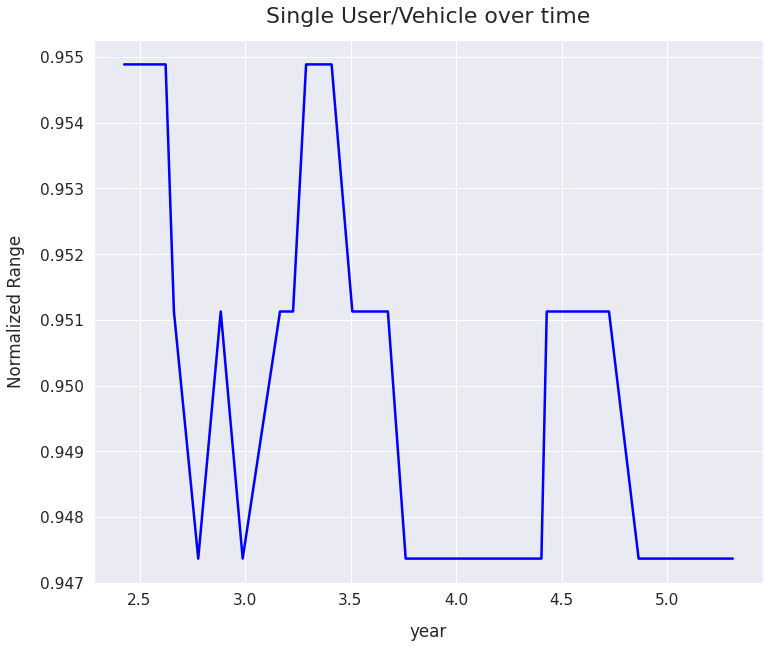

In [ ]:
# Create line plot with Relative Range against vehicle age in years (`z_actual` vs `x`) for the vehicle with largest number of datapoints recorded. It should look something like this


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

sns.set(font_scale=1.4)


filterinfDataframe.set_index('Vehicle age')['Remaining battery capacity'].plot(figsize=(12, 10), linewidth=2.5, color='blue')
plt.xlabel("year", labelpad=15)
plt.ylabel("Normalized Range", labelpad=15)
plt.title("Single User/Vehicle over time", y=1.02, fontsize=22);

AxesSubplot(0.125,0.125;0.775x0.755)


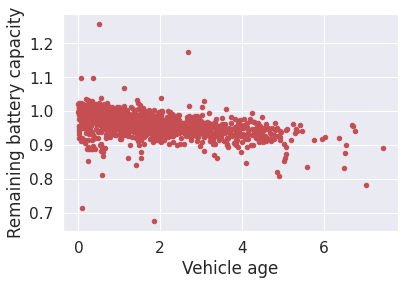

In [ ]:
# Create scatter plot with Relative Range against vehicle age in years (`z_actual` vs `x`) for all data points (all vehicles). The plot should look something like this

import pandas as pd
import numpy as np



ax1 = new.plot(kind='scatter', x='Vehicle age', y='Remaining battery capacity', color='r')


print(ax1)  # True

In [ ]:
#data set for liner regression
LR= new[['Vehicle age','Remaining battery capacity']]

LR = LR.dropna()
print(LR)

      Vehicle age  Remaining battery capacity
0        0.160112                    1.015190
1        0.525281                    0.987755
2        1.443820                    0.964206
3        3.783708                    0.946309
4        4.199438                    0.976636
...           ...                         ...
1530     0.098315                    1.010127
1531     0.410112                    1.003953
1532     0.837079                    0.979747
1533     1.143258                    0.972152
1534     1.435393                    0.956962

[1531 rows x 2 columns]


In [ ]:
#Create a linear model (fit a line) `z = f(x) = A + B*x` (optimize by least square error) to estimate Relative Range from  vehicle age. You are encouraged to make use of existing open source code to help your optimization.

In [ ]:

X = LR['Vehicle age'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = LR['Remaining battery capacity'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
  #

In [ ]:
# Building the model
X_mean = np.mean(LR['Vehicle age'].values)
Y_mean = np.mean(LR['Remaining battery capacity'].values)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

[-0.01267447] [0.98407564]


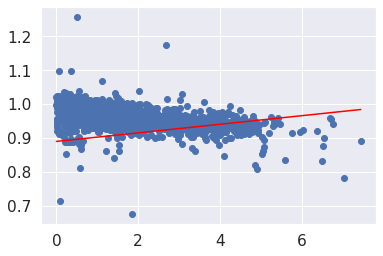

In [ ]:
# Making predictions and Plot Relative Range model evaluation (`z_pred` vs `x`) in the same figure as corresponding datapoints scatter plot (`z_actual` vs `x`) so that the line goes through the datapoints
Y_pred = m*X + c

plt.scatter(X, Y) # actual

plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

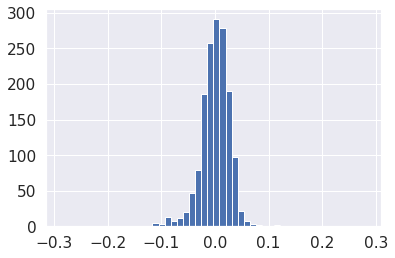

In [ ]:
# Plot distribution (histogram plot) of model estimation errors (`z_actual` - `z_pred`)

import matplotlib.pyplot as plt

x = Y- Y_pred
plt.hist(x, bins = 50)
plt.show()

In [ ]:
#Calculate standard error (standard deviation) of the Relative Range estimates


In [ ]:
# Python code to demonstrate std dev function

np.std(Y_pred, dtype=np.float64)




0.01671422227759674